# Dataset

The fetch_covtype dataset, part of the sklearn.datasets module, is a dataset for multiclass classification that predicts forest cover types from cartographic variables.
Purpose: Predict the forest cover type in various wilderness areas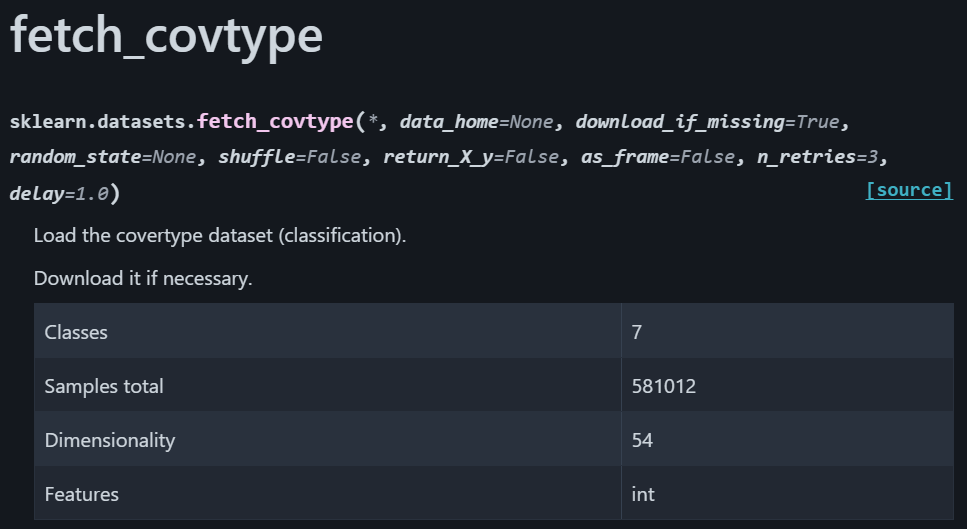

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
#Extracting the features (x) and target labels (y) from the fetch_covtype/ labels: 7 classes
x, y = covtype.data, covtype.target

In [ ]:
x

array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
y

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Pre-processing
#scales features to a specific range [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert labels to categorical format (One-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train - 1)  # -1 to match zero-based indexing for Keras
y_test = to_categorical(y_test - 1)

# ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [ ]:
# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.6968 - loss: 0.7060 - val_accuracy: 0.7518 - val_loss: 0.5744
Epoch 2/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7587 - loss: 0.5579 - val_accuracy: 0.7664 - val_loss: 0.5403
Epoch 3/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7748 - loss: 0.5204 - val_accuracy: 0.7803 - val_loss: 0.5046
Epoch 4/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7854 - loss: 0.4943 - val_accuracy: 0.7957 - val_loss: 0.4762
Epoch 5/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7926 - loss: 0.4785 - val_accuracy: 0.7962 - val_loss: 0.4736
Epoch 6/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8014 - loss: 0.4607 - val_accuracy: 0.8059 - val_loss: 0.4572
Epoch 7/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8068 - loss: 0.4489 - val_accuracy: 0.8106 - val_loss: 0.4419
Epoch 8/10
13073/13073 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

# Testing

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy * 100:.2f}%")

Test accuracy: 82.36%


In [ ]:
# Prediction on test set and accuracy check
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test set accuracy calculated manually: {test_accuracy * 100:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Test set accuracy calculated manually: 82.36%


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_save_path = '/content/drive/MyDrive/covtypeANN_model.h5'
model.save(model_save_path)

In [ ]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>